In [1]:
import yt
import numpy as np
from yt.units import kpc
import matplotlib.pyplot as plt
from consistency import *
mpl.rcParams['text.usetex'] = True
import seaborn as sns
from mpl_toolkits.axes_grid1 import AxesGrid

/Users/rsimons/Desktop/git/foggie_local/consistency.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda2/envs/grizli/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda2/envs/grizli/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda2/envs/grizli/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.st

In [2]:
DDname = 'DD1049'

ds_dir = '/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508'
ds_n = yt.load('%s/nref11n_selfshield_z15/%s/%s'%(ds_dir, DDname, DDname))
ds_f = yt.load('%s/nref11n_nref10f_selfshield_z6/%s/%s'%(ds_dir, DDname, DDname))

gp_n = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_selfshield_z15_DD1049_galprops.npy', encoding = 'latin1')[()]
gp_f = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_nref10f_selfshield_z6_DD1049_galprops.npy', encoding = 'latin1')[()]



yt : [INFO     ] 2019-02-04 12:33:51,191 Parameters: current_time              = 295.31652781829
yt : [INFO     ] 2019-02-04 12:33:51,191 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-02-04 12:33:51,192 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-04 12:33:51,193 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-02-04 12:33:51,194 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-04 12:33:51,194 Parameters: current_redshift          = 0.90013196382637
yt : [INFO     ] 2019-02-04 12:33:51,195 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-02-04 12:33:51,196 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-02-04 12:33:51,197 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-02-04 12:33:51,234 Parameters: current_time              = 295.31652781829
yt : [INFO     ] 2019-02-04 12:33:51,235 Parameters: domain_dimensions         = [256

In [3]:
sats_n = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_selfshield_z15_%s_sats.npy'%DDname)[()]
sats_f = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_selfshield_z6_%s_sats.npy'%DDname)[()]
def _stars(pfilter, data):
    return data[(pfilter.filtered_type, "particle_type")] == 2

# these are only the must refine dark matter particles
def _darkmatter(pfilter, data):
    return data[(pfilter.filtered_type, "particle_type")] == 4

yt.add_particle_filter("stars",function=_stars, filtered_type='all',requires=["particle_type"])
yt.add_particle_filter("darkmatter",function=_darkmatter, filtered_type='all',requires=["particle_type"])
ds_n.add_particle_filter('stars')
ds_n.add_particle_filter('darkmatter')
ds_f.add_particle_filter('stars')
ds_f.add_particle_filter('darkmatter')




Parsing Hierarchy : 100%|██████████| 1387/1387 [00:00<00:00, 5912.57it/s]
yt : [INFO     ] 2019-02-04 12:33:53,545 Gathering a field list (this may take a moment.)
Parsing Hierarchy : 100%|██████████| 4411/4411 [00:00<00:00, 5569.32it/s]
yt : [INFO     ] 2019-02-04 12:33:56,126 Gathering a field list (this may take a moment.)


True

yt : [INFO     ] 2019-02-04 13:07:14,894 Projection completed
yt : [INFO     ] 2019-02-04 13:07:14,895 xlim = 38161.801784 38311.801784
yt : [INFO     ] 2019-02-04 13:07:14,895 ylim = 37202.342116 37352.342116
yt : [INFO     ] 2019-02-04 13:07:14,897 xlim = 0.503962 0.505942
yt : [INFO     ] 2019-02-04 13:07:14,898 ylim = 0.491291 0.493272
yt : [INFO     ] 2019-02-04 13:07:14,899 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


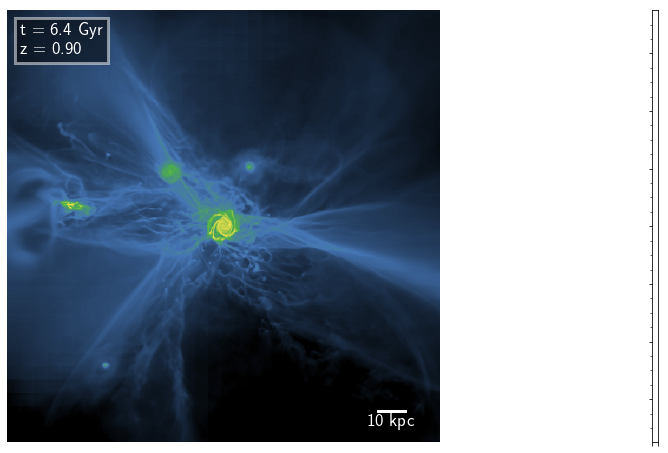

In [24]:
wd = 150
W = yt.YTArray([wd, wd, wd], 'kpc')


wd2 = 20
W2 = yt.YTArray([wd2, wd2, wd2], 'kpc')

N = 150
north_vector = [0,1,0]

sats = sats_f
ds = ds_f
gp = gp_f
fig_ap = 'f'

cen_g = yt.YTArray(gp['stars_center'][0], 'kpc')



fig = plt.figure(1, figsize = (20,20))

grid = AxesGrid(fig, (0.0,0.0,1.0,1.0),
                nrows_ncols = (1, 2),
                axes_pad = 0.0, label_mode = "1",
                share_all = False, cbar_mode=None,
                aspect = False)        

box = ds.r[cen_g[0] - 0.5 * yt.YTArray(max([200., wd]), 'kpc'): cen_g[0] + 0.5 * yt.YTArray(max([200., wd]), 'kpc'), \
           cen_g[1] - 0.5 * yt.YTArray(max([200., wd]), 'kpc'): cen_g[1] + 0.5 * yt.YTArray(max([200., wd]), 'kpc'), \
           cen_g[2] - 0.5 * yt.YTArray(max([200., wd]), 'kpc'): cen_g[2] + 0.5 * yt.YTArray(max([200., wd]), 'kpc')]


if True:
    if True:
        p = yt.ProjectionPlot(ds, 'y', ("gas","density"), center = cen_g, data_source=box, width=W)
        p.set_unit(('gas','density'), 'Msun/pc**2')
        p.set_zlim(('gas', 'density'), zmin = density_proj_min, zmax =  density_proj_max)
        p.set_cmap(('gas', 'density'), density_color_map)
        #p.annotate_timestamp(corner='upper_left', redshift=True, draw_inset_box=True)
        #p.annotate_marker(pos = ds.arr(cen), coord_system = 'data', marker = 's', plot_args={'s':400, 'facecolors':'None', 'color':'white'})
        p.hide_axes()
        #p.annotate_timestamp(corner='upper_left', redshift=True, draw_inset_box=True, inset_box_args={})
        p.annotate_timestamp(x_pos=0.03, y_pos = 0.97,coord_system = 'axis', text_args={'horizontalalignment':'left', 'verticalalignment': 'top', 'color':'white'}, redshift=True, draw_inset_box=True)
        
        
        p.annotate_scale(size_bar_args={'color':'white'})
        plot = p.plots[("gas","density")]
        plot.figure = fig
        plot.axes = grid[0].axes
        p._setup_plots()

    if False:
        p = yt.ParticleProjectionPlot(ds, 'y', ('stars', 'particle_mass'), center = cen_g, data_source=box, width = W)   
        cmp = plt.cm.Greys_r
        cmp.set_bad('k')
        p.set_cmap(field = ('stars','particle_mass'), cmap = cmp)
        p.hide_axes()
        p.annotate_scale(size_bar_args={'color':'white'})
        #p.annotate_marker(pos = ds.arr(cen), coord_system = 'data', marker = 'o')
        #c = [0.1, 0.1]
        #p.annotate_text(c, 'o', coord_system = 'axis', text_args={'family':'sans-serif', 'color': 'white', 'ha': 'center', 'va': 'center', 'size':60, 'alpha':0.3, 'fontweight':'ultralight'})

        p.set_zlim(field = ('stars','particle_mass'), zmin = 2.e35, zmax = 1.e42)
        plot = p.plots[('stars','particle_mass')]
        plot.figure = fig
        plot.axes = grid[1].axes
        p._setup_plots()




    fig.set_size_inches(12, 6)
    fig.savefig('cen_%s_s_map.png'%(fig_ap))


if False:
    for s, sat in enumerate(sats):
        cen = yt.YTArray([sat[0], sat[1], sat[2]], 'kpc')
        field = 'HI'
        if True:
            fig = plt.figure(1, figsize = (20,20))

            grid = AxesGrid(fig, (0.0,0.0,1.0,1.0),
                            nrows_ncols = (1, 2),
                            axes_pad = 0.0, label_mode = "1",
                            share_all = False, cbar_mode=None,
                            aspect = False)        



        if True:
            p1 = yt.ProjectionPlot(ds, 'y', ("gas","density"), center = cen, data_source=box, width=W2)
            p1.set_unit(('gas','density'), 'Msun/pc**2')
            p1.set_zlim(('gas', 'density'), zmin = density_proj_min, zmax =  density_proj_max)
            p1.set_cmap(('gas', 'density'), density_color_map)
            p1.annotate_timestamp(corner='upper_left', redshift=True, draw_inset_box=True)
            #p.annotate_marker(pos = ds.arr(cen), coord_system = 'data', marker = 's', plot_args={'s':400, 'facecolors':'None', 'color':'white'})
            p1.hide_axes()
            p1.annotate_timestamp(corner='upper_left', redshift=True, draw_inset_box=True)
            p1.annotate_scale(size_bar_args={'color':'white'})
            plot = p1.plots[("gas","density")]
            plot.figure = fig
            plot.axes = grid[0].axes
            p1._setup_plots()

        if True:
            #p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_z', ('stars', 'particle_mass'), center = cen, width = W)   
            p2 = yt.ParticleProjectionPlot(ds, 'y', ('stars', 'particle_mass'), center = cen, data_source=box, width = W2)   
            cmp = plt.cm.Greys_r
            cmp.set_bad('k')
            p2.set_cmap(field = ('stars','particle_mass'), cmap = cmp)
            p2.hide_axes()
            p2.annotate_scale(size_bar_args={'color':'white'})
            #p.annotate_marker(pos = ds.arr(cen), coord_system = 'data', marker = 'o')
            #c = [0.1, 0.1]
            #p.annotate_text(c, 'o', coord_system = 'axis', text_args={'family':'sans-serif', 'color': 'white', 'ha': 'center', 'va': 'center', 'size':60, 'alpha':0.3, 'fontweight':'ultralight'})

            p2.set_zlim(field = ('stars','particle_mass'), zmin = 5.e35, zmax = 1.e42)
            plot = p2.plots[('stars','particle_mass')]
            plot.figure = fig
            plot.axes = grid[1].axes
            p2._setup_plots()


        fig.set_size_inches(12, 6)
        fig.savefig('sat_%s_%s_s_map.png'%(fig_ap, s))
